# Using HDF5 Posterior Files

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py

from astropy.table import Table

To open an HDF file using the h5py module we do:

In [2]:
cosmos_hdf = h5py.File('../../dmu24/dmu24_COSMOS/data/pz_hb_cosmos.hdf', 'r')

Each HDF5 posterior file contains three different datasets:

In [3]:
cosmos_hdf.keys()

[u'help_id', u'pz', u'zgrid']

These datasets contain the list of HELP IDs for which photometric redshifts are available (`help_id`), the grid of redshift steps used during template fitting (`zgrid`) and the 2D array of redshift posteriors evaluated on the redshift grid (`pz`).

In [4]:
cosmos_hdf['pz'].shape

(694478, 694)

In [5]:
len(cosmos_hdf['help_id']) == cosmos_hdf['pz'].shape[0]

True

In [6]:
len(cosmos_hdf['zgrid']) == cosmos_hdf['pz'].shape[1]

True

For large fields, the HDF5 file can be sliced directly without needing to load the entire array into memory. For example:

In [7]:
source_pz = cosmos_hdf['pz'][1000]

But the datasets can also be loaded into memory

In [8]:
pz = cosmos_hdf['pz'].value
zgrid = cosmos_hdf['zgrid'].value

Finally we plot two redshift posteriors for sources in the COSMOS field.

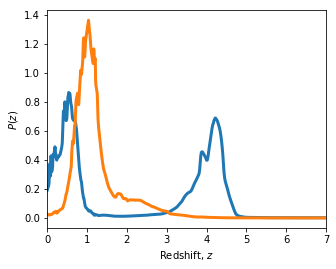

In [9]:
Fig, Ax = plt.subplots(1,1, figsize=(5,4))

Ax.set_xlim([0,7])
Ax.plot(zgrid, pz[-199], lw=3)
Ax.plot(zgrid, pz[23492], lw=3)
Ax.set_xlabel(r'Redshift, $z$')
Ax.set_ylabel(r'$P(z)$')